____________

# THE ANALYSIS OF WELLBEING AND LIFESTYLE PARAMETERS ON WORK-LIFE BALANCE

_______________________

## 1. Introduction

### Context

In an era marked by rapid technological change and increasing lifestyle demands, understanding the impact of various lifestyle factors on work-life balance is crucial. This analysis leverages a comprehensive dataset to explore how daily activities and personal achievements influence overall well-being.

### Content
Centering on the variables of 'TODO_COMPLETED', 'SUFFICIENT_INCOME', 'DAILY_STRESS', and 'FRUITS_VEGGIES', our study delves into how these distinct yet interconnected elements contribute to an individual’s ability to achieve a balanced and satisfying life. Each variable provides a lens through which to assess different facets of well-being:

TODO_COMPLETED: Examines the correlation between task completion and feelings of accomplishment.

SUFFICIENT_INCOME: Considers the impact of financial security on personal satisfaction and stress.

DAILY_STRESS: Investigates the direct effects of stress on health and daily functioning.

FRUITS_VEGGIES: Looks at the role of diet in maintaining physical health and overall vitality.

ACHIEVEMENTS: Focuses on the effects of personal and professional achievements on overall life satisfaction, measuring how accomplishments in various domains of life contribute to feelings of success and happiness.

### Objective

The main objective of this analysis is to identify and quantify the relationship between several key lifestyle factors—including task completion, financial stability, daily stress, dietary habits, personal achievements, and their collective impact on work-life balance.

____

## 2. Methodology

### 2.1 Data Collection

The dataset used in this analysis is sourced from a publicly available collection on Kaggle, containing 15,977 responses to a comprehensive survey on wellbeing and lifestyle. This survey captured various aspects of respondents' lifestyles, including task completion rates, income sufficiency, daily stress levels, fruit and vegetable intake, and personal achievements. These attributes were utilized to assess their impact on work-life balance. Acknowledging that the data was not personally collected but obtained through Kaggle ensures clarity regarding the origin and scope of the data.

### 2.2 Analytical Techniques

#### Descriptive Statistics
We began by summarizing the central tendencies, dispersion, and shape of the dataset's distribution through measures such as mean, median, mode, range, variance, and standard deviation. This provided a preliminary understanding of the data's characteristics and helped identify any anomalies.

#### Data Cleaning and Preparation
The dataset underwent thorough cleaning and preparation processes, which included handling missing values, correcting data entry errors, and standardizing data formats. This ensured the data's integrity and usability for further analysis. Additionally, text data was converted into numerical formats, and meaningful features were extracted from date-time information to enable more effective analysis.

#### Exploratory Data Analysis (EDA)
Our EDA process involved a variety of visualization techniques mixed with regression analysis to understand the distribution and relationships of the variables within our dataset. 

#### Statistical Modeling
In this study, we employed multiple statistical models to rigorously analyze the influence of key lifestyle factors on work-life balance. The primary techniques used were linear regression and correlation analysis, designed to quantify relationships and assess the strength of associations between variables.

#### Regression Analysis
Multiple linear regression analysis was employed to explore the relationships between lifestyle factors (like task completion, financial stability, and dietary habits) and work-life balance scores. This method helped quantify the impact of each predictor on the outcome variable.

#### Interpretation and Implications
The results from the regression analysis were interpreted to understand the influence of each variable on work-life balance. This section discusses the practical implications of these findings in real-world settings.



____

## 3. Data Cleaning and Preparation

In [188]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from scipy.stats import linregress
import numpy as np


In [189]:
raw_df = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')
raw_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [190]:
raw_df.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [191]:
raw_df.describe()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2.922677,5.232970,5.508077,5.616454,6.474267,4.000751,2.715314,1.410656,5.745993,3.194778,5.703606,3.752129,7.042888,2.898886,2.930879,1.728963,5.711558,3.326572,6.233346,666.751503
std,1.442694,3.311912,2.840334,3.242021,3.086672,2.755837,1.851586,0.491968,2.624097,2.357518,2.891013,3.230987,1.199044,3.692180,2.676301,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


In [192]:
#Converting the 'DAILY_STRESS' column to integers
def convert_level_range_to_integer(level_range):
    level_values = [int(value) for value in level_range.split() if value.isdigit()]
    return level_values[0] if level_values else None

# Applying the function to the 'DAILY_STRESS' column
raw_df['DAILY_STRESS'] = raw_df['DAILY_STRESS'].apply(convert_level_range_to_integer)



In [193]:
raw_df.Timestamp.unique()

array(['7/7/15', '7/8/15', '7/9/15', ..., '3/14/21 8:35', '3/14/21 8:43',
       '3/14/21 9:03'], dtype=object)

In [194]:
# Extracting year from the 'Timestamp' column
def extract_year(date_str):
    try:
        date_obj = pd.to_datetime(date_str, format="%m/%d/%y %H:%M")
        return date_obj.year
    except ValueError:
        try:
            date_obj = pd.to_datetime(date_str, format="%m/%d/%y")
            return date_obj.year
        except ValueError:
            return None


clean_df = raw_df
# Applying the extract_year function to the 'date' column
clean_df['year'] = clean_df['Timestamp'].apply(extract_year)


In [195]:
def extract_month_text(date_str):
    try:
        date_obj = pd.to_datetime(date_str, format="%m/%d/%y %H:%M")
        return date_obj.strftime("%B")
    except ValueError:
        try:
            date_obj = pd.to_datetime(date_str, format="%m/%d/%y")
            return date_obj.strftime("%B")
        except ValueError:
            return None

# Applying the extract_month_text function to the 'date' column
clean_df['month_text'] = clean_df['Timestamp'].apply(extract_month_text)


wellbeing_df=clean_df

In [196]:
wellbeing_df.drop_duplicates(inplace=True)

In [197]:
wellbeing_df.dropna(subset=['DAILY_STRESS', 'WORK_LIFE_BALANCE_SCORE'], inplace=True)


In [198]:
wellbeing_df.shape

(15489, 26)

In [199]:
wellbeing_df.describe()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE,year
count,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,...,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000
mean,2.922461,2.792304,5.226096,5.513397,5.619214,6.489380,4.000129,2.716186,1.409000,5.749629,...,3.752211,7.038543,2.891536,2.924075,1.730518,5.710117,3.321002,6.222932,666.840216,2017.704565
std,1.443403,1.369373,3.315673,2.839107,3.244255,3.084892,2.760358,1.851407,0.491665,2.623192,...,3.226062,1.198958,3.686636,2.676042,0.443705,3.091143,2.728172,3.017481,45.002570,1.787780
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000,2015.000000
25%,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,...,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000,2016.000000
50%,3.000000,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,...,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,6.000000,667.900000,2018.000000
75%,4.000000,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,...,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000,2019.000000
max,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000,2021.000000


______________________

## 4. EXPLORATORY DATA ANALYSIS

#### VISUALIZATIONS

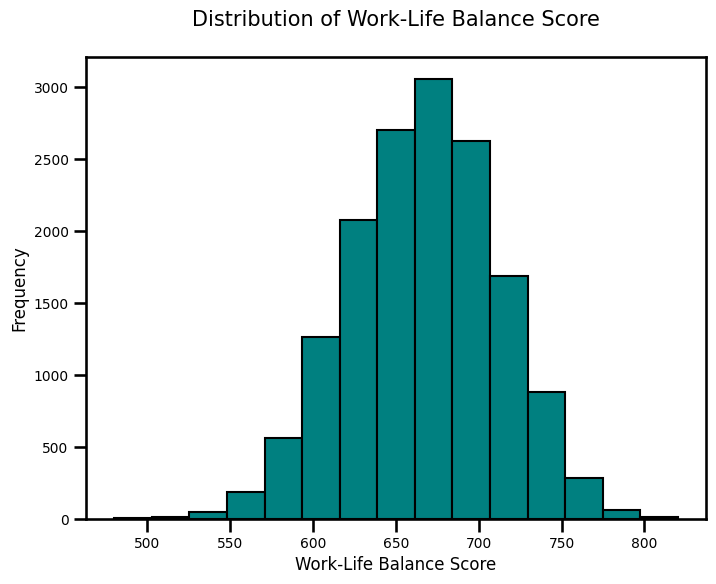

In [200]:
plt.figure(figsize=(8, 6))
# Plotting histogram, to check for normality
plt.hist(wellbeing_df['WORK_LIFE_BALANCE_SCORE'], bins=15, color='teal', edgecolor='black')
plt.xlabel('Work-Life Balance Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Work-Life Balance Score', y=1.05, fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


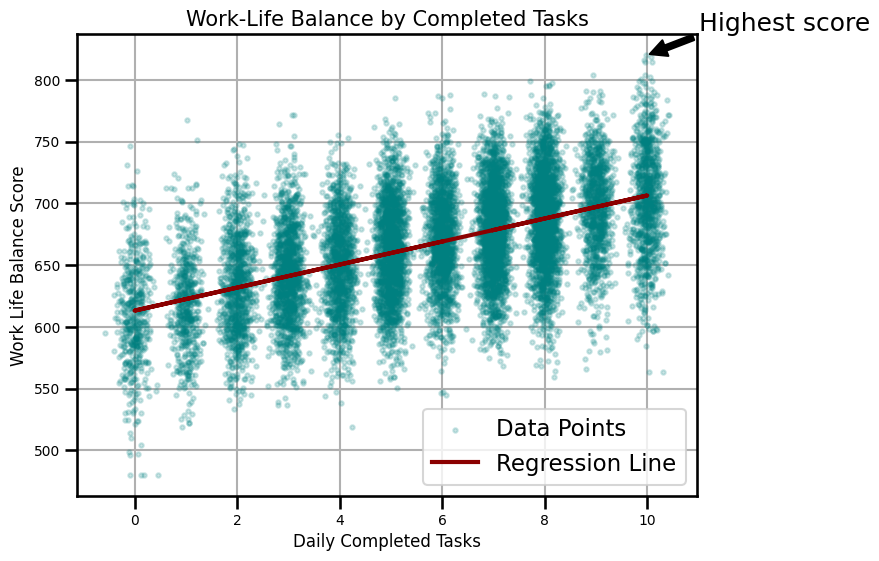

In [212]:

#Calculating regregression line to show the relationship between daily stress and work life balance
slope, intercept, r_value, p_value, std_err = linregress(wellbeing_df.TODO_COMPLETED, wellbeing_df.WORK_LIFE_BALANCE_SCORE)
line = slope * np.array(wellbeing_df.TODO_COMPLETED) + intercept

#Visualizing the relationship between daily stress and work life balance using scatter plot
plt.figure(figsize=(8, 6))
plt.grid(True)
# Adding jitter to the data points to improve visibility
jittered_tasks = wellbeing_df.TODO_COMPLETED + np.random.normal(0, 0.15, size=len(wellbeing_df.TODO_COMPLETED)) 
plt.scatter(jittered_tasks, wellbeing_df.WORK_LIFE_BALANCE_SCORE, alpha=0.2, s=10, zorder=2, color='teal')
plt.plot(wellbeing_df.TODO_COMPLETED, line, color='darkred', label=f'y={slope:.2f}x+{intercept:.2f}', linewidth=3)
plt.annotate('Highest score', xy=(wellbeing_df.TODO_COMPLETED.max(), wellbeing_df.WORK_LIFE_BALANCE_SCORE.max() ), xytext=(wellbeing_df.TODO_COMPLETED.max()+1, wellbeing_df.WORK_LIFE_BALANCE_SCORE.max()+20),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.tick_params(axis='both', which='major', labelsize=10)
plt.title('Work-Life Balance by Completed Tasks', fontsize=15)
plt.xlabel('Daily Completed Tasks', fontsize=12)
plt.ylabel('Work Life Balance Score', fontsize=12)
plt.legend(['Data Points','Regression Line'])
plt.show()

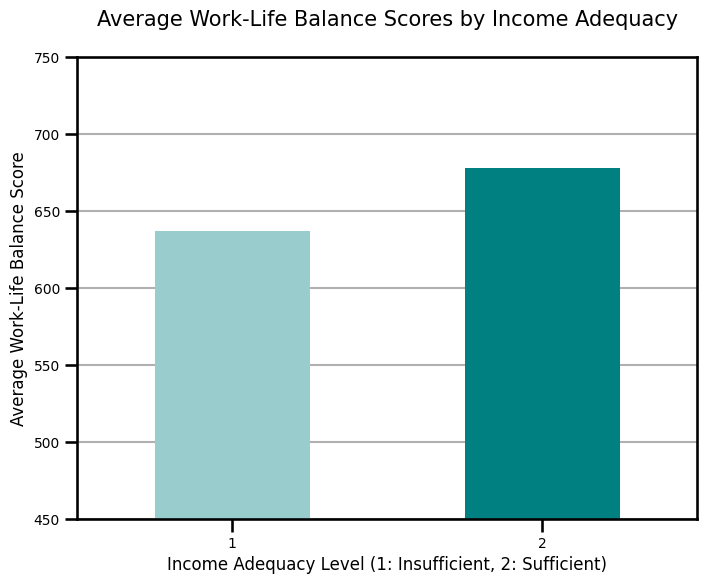

In [202]:

# Calculating average work-life balance score by income adequacy
mean_scores = wellbeing_df.groupby('SUFFICIENT_INCOME')['WORK_LIFE_BALANCE_SCORE'].mean()

# Plotting the average work-life balance score by income adequacy
plt.figure(figsize=(8, 6))
mean_scores.plot(kind='bar', color=['#99cccc', 'teal'], zorder= 2)
plt.title('Average Work-Life Balance Scores by Income Adequacy', y=1.05, fontsize=15)
plt.xlabel('Income Adequacy Level (1: Insufficient, 2: Sufficient)', fontsize=12)
plt.ylabel('Average Work-Life Balance Score', fontsize=12)
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylim(450, 750)  
plt.grid(axis='y')
plt.show()


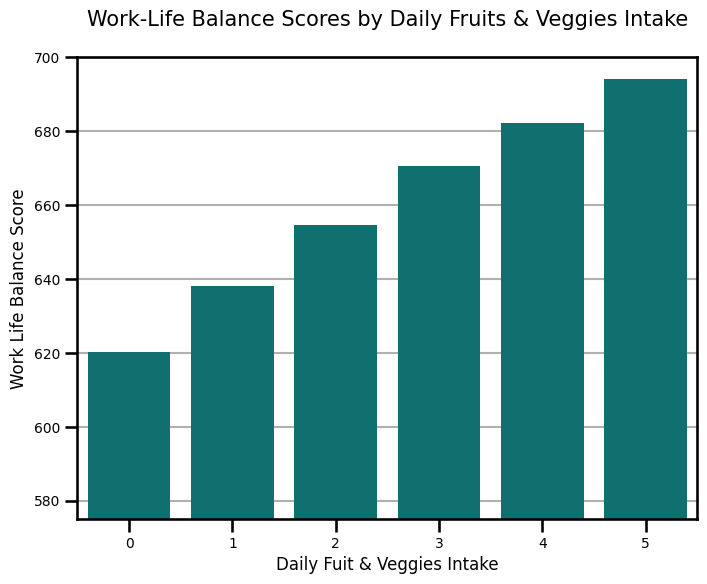

In [203]:
plt.figure(figsize=(8, 6))

sns.barplot(x='FRUITS_VEGGIES', y='WORK_LIFE_BALANCE_SCORE', data=wellbeing_df, color='teal', zorder=2, errorbar=None)


plt.title('Work-Life Balance Scores by Daily Fruits & Veggies Intake', y=1.05, fontsize=15)
plt.xlabel('Daily Fuit & Veggies Intake', fontsize=12)
plt.ylabel('Work Life Balance Score', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(axis='y')
plt.ylim(575, 700)
plt.show()

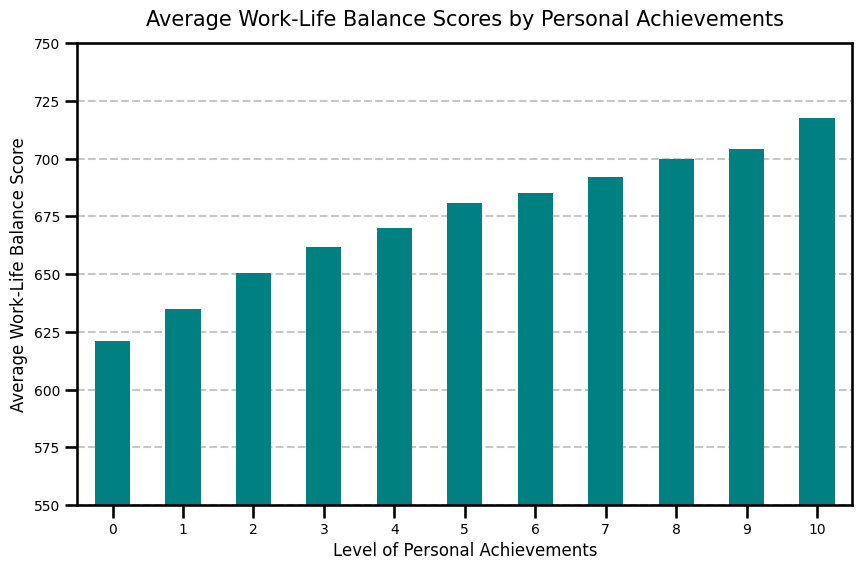

In [209]:
mean_scores = wellbeing_df.groupby('ACHIEVEMENT')['WORK_LIFE_BALANCE_SCORE'].mean()

plt.figure(figsize=(10, 6))
mean_scores.plot(kind='bar', color='teal', zorder=2)
plt.title('Average Work-Life Balance Scores by Personal Achievements', y=1.02, fontsize=15)
plt.xlabel('Level of Personal Achievements', fontsize=12)
plt.ylabel('Average Work-Life Balance Score', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(550, 750) 
plt.show()

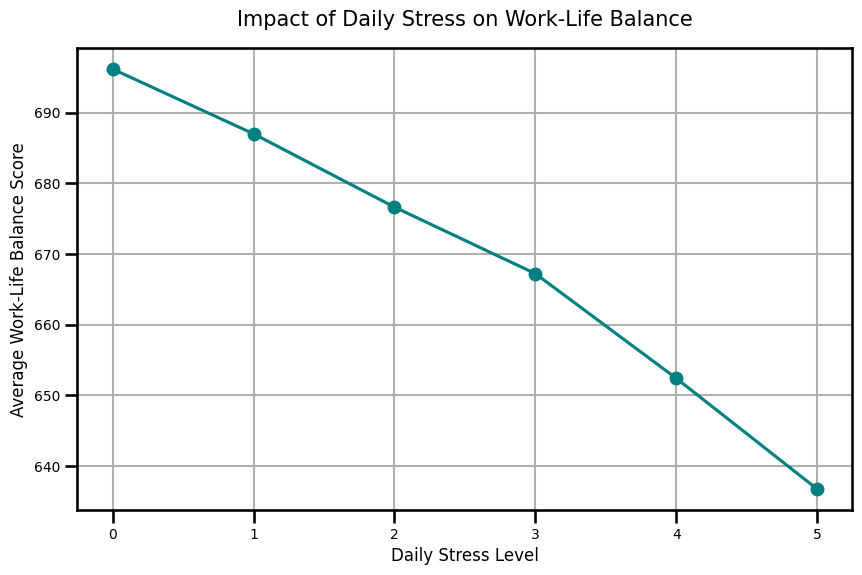

In [207]:
grouped_data = wellbeing_df.groupby('DAILY_STRESS')['WORK_LIFE_BALANCE_SCORE'].mean().reset_index()
x = grouped_data['DAILY_STRESS'] 
y = grouped_data['WORK_LIFE_BALANCE_SCORE'] 

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='teal')
plt.title('Impact of Daily Stress on Work-Life Balance', y=1.03, fontsize=15)
plt.xlabel('Daily Stress Level', fontsize=12)
plt.ylabel('Average Work-Life Balance Score', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(True)
plt.show()

___

## 5. Regression Analysis

In [206]:
# building a multiple regression model
X = wellbeing_df[['TODO_COMPLETED', 'SUFFICIENT_INCOME', 'DAILY_STRESS', 'FRUITS_VEGGIES', 'ACHIEVEMENT']]
X = sm.add_constant(X)  # adding a constant
Y = wellbeing_df['WORK_LIFE_BALANCE_SCORE']

model = sm.OLS(Y, X).fit()
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     WORK_LIFE_BALANCE_SCORE   R-squared:                       0.663
Model:                                 OLS   Adj. R-squared:                  0.663
Method:                      Least Squares   F-statistic:                     6104.
Date:                     Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                             19:34:16   Log-Likelihood:                -72506.
No. Observations:                    15489   AIC:                         1.450e+05
Df Residuals:                        15483   BIC:                         1.451e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

______

### 6. RESULTS

### Understanding Work-Life Balance: Key Insights from Our Study


In our recent study, we examined how different aspects of daily life—such as completing tasks, financial security, stress levels, healthy eating, and personal achievements—impact people’s work-life balance. We used a statistical method to analyze survey data from over 15,000 participants to find out just how much these factors affect our sense of balance between work and personal life.

What Did We Find?

Tasks Completed: For every additional task people complete, their work-life balance score increases 4.89 points, suggesting that getting things done contributes positively to how we feel about our work-life balance.

Financial Security: Not surprisingly, having enough income contributes significantly to better work-life balance. Our results show that this has one of the strongest positive effects on how balanced people feel.

Sufficient Income: This factor seems to have the most substantial positive impact, with an increase of about 23.06 points in work-life balance scores.

Daily Stress: As expected, more stress in daily life leads to worse work-life balance. With each unit increase leads to a decrease of around 7.19 points in the score. Our study quantifies just how detrimental stress can be.

Healthy Eating: Eating more fruits and vegetables is also linked to better work-life balance. With each additional serving correlating with an approximate 8.46 point increase in work-life balance scores. Our findings support the idea that good nutrition is important for feeling balanced and satisfied.

Personal Achievements: Achieving personal goals is strongly associated with better work-life balance. Personal achievements are shown to enhance work-life balance by about 6.21 points for each unit increase in the achievement score This suggests that personal growth and success are key contributors to feeling balanced.

What Do These Results Mean?

Our analysis shows that what we do, how we live, and our achievements play significant roles in how balanced our lives feel. Notably, financial security and personal accomplishments are particularly powerful in influencing our overall satisfaction with work and life.

The statistics from the study are very reliable, showing that these results are consistent and significant. This means that the chances that these findings are due to random chance are extremely low, reinforcing the importance of these lifestyle factors in enhancing work-life balance.

Moving Forward

Based on these insights, focusing on improving financial stability, managing stress, eating healthily, achieving personal goals, and staying productive can be effective ways for individuals and organizations to enhance work-life balance. These findings can help guide policies and personal decisions aimed at improving overall well-being.

_____

#### 7. DISCUSSIONS

##### INTERPRETATION
The results highlight a complex interplay between personal habits, financial security, and stress management in achieving satisfactory work-life balance. Achievements in personal and professional domains were particularly impactful, suggesting that fulfillment in these areas significantly enhances overall life satisfaction.

##### LIMITATIONS
Although the model provided significant insights, it did not account for potential interactions between variables, which could further clarify the dynamics of work-life balance. Additionally, the self-reported nature of the data might introduce bias.


##### RECOMMENDATIONS FOR FUTURE RESEARCH
Based on the limitations observed during the current study and the results obtained, we outlined potential areas for further research. This includes exploring interaction effects, conducting longitudinal studies to assess causality, and expanding the analysis to include additional variables that may affect work-life balance.